In [1]:
import pandas as pd, numpy as np

In [2]:
#Lecture à partir du fichier
data_f = pd.read_csv('diabetes.csv')


In [3]:
#Afficher dataframe
data_f.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Afficher le type de data_f
type(data_f)


pandas.core.frame.DataFrame

In [5]:
#Construire  le jeu de données
feature = ["Pregnancies",
           "Insulin","BMI","Age","Glucose", "BloodPressure","SkinThickness"]

X = data_f[feature]
y = data_f.Outcome

In [6]:
print(X)


     Pregnancies  Insulin   BMI  Age  Glucose  BloodPressure  SkinThickness
0              6        0  33.6   50      148             72             35
1              1        0  26.6   31       85             66             29
2              8        0  23.3   32      183             64              0
3              1       94  28.1   21       89             66             23
4              0      168  43.1   33      137             40             35
..           ...      ...   ...  ...      ...            ...            ...
763           10      180  32.9   63      101             76             48
764            2        0  36.8   27      122             70             27
765            5      112  26.2   30      121             72             23
766            1        0  30.1   47      126             60              0
767            1        0  30.4   23       93             70             31

[768 rows x 7 columns]


Définir X_train (75 %), X_test, y_train, y_test 

Apprentisage avec Arbre de Décision de profondeur 3

Afficher le score

Quelle est l'estimation pour la nouvelle donnée Xnew=[1, 50,27,25,88,70,20]

Afficher l'arbre de décision et analyser les mesures affichées (gini, samples, value)


Le score du modèle est : 0.78125
Estimation pour la nouvelle donnée : [0]

Afficher l'arbre de décision :


c:\Users\Etudiant\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


[Text(0.5, 0.875, 'Glucose <= 127.5\ngini = 0.443\nsamples = 576\nvalue = [385, 191]\nclass = Non-diabetic'),
 Text(0.25, 0.625, 'Age <= 28.5\ngini = 0.294\nsamples = 357\nvalue = [293, 64]\nclass = Non-diabetic'),
 Text(0.125, 0.375, 'BMI <= 30.95\ngini = 0.161\nsamples = 204\nvalue = [186, 18]\nclass = Non-diabetic'),
 Text(0.0625, 0.125, 'gini = 0.018\nsamples = 108\nvalue = [107, 1]\nclass = Non-diabetic'),
 Text(0.1875, 0.125, 'gini = 0.291\nsamples = 96\nvalue = [79, 17]\nclass = Non-diabetic'),
 Text(0.375, 0.375, 'Insulin <= 140.0\ngini = 0.421\nsamples = 153\nvalue = [107, 46]\nclass = Non-diabetic'),
 Text(0.3125, 0.125, 'gini = 0.361\nsamples = 131\nvalue = [100, 31]\nclass = Non-diabetic'),
 Text(0.4375, 0.125, 'gini = 0.434\nsamples = 22\nvalue = [7, 15]\nclass = Diabetic'),
 Text(0.75, 0.625, 'BMI <= 29.95\ngini = 0.487\nsamples = 219\nvalue = [92, 127]\nclass = Diabetic'),
 Text(0.625, 0.375, 'Glucose <= 151.5\ngini = 0.437\nsamples = 65\nvalue = [44, 21]\nclass = Non-di

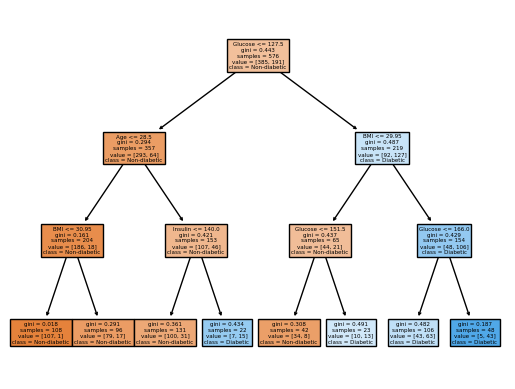

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree


# Définir X_train (75 %), X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44)

# Apprentissage avec Arbre de Décision de profondeur 3
decision_tree = DecisionTreeClassifier(max_depth=3, random_state=44)
decision_tree.fit(X_train, y_train)


# Afficher le score
score = accuracy_score(y_test, decision_tree.predict(X_test))
print("\nLe score du modèle est :", score)


# Estimation pour la nouvelle donnée
X_new = [[1, 50, 27, 25, 88, 70, 20]]
prediction_new_data = decision_tree.predict(X_new)
print("Estimation pour la nouvelle donnée :", prediction_new_data)


# Afficher l'arbre de décision
print("\nAfficher l'arbre de décision :")
plot_tree(decision_tree, feature_names=feature, class_names=["Non-diabetic", "Diabetic"], filled=True)

 En utilisant la méthode PCA, diminuer la dimension à 3. Comment pouvez-vous savoir  la précision que vous pouvez obtenir avec les données à 3 dimension.  

In [26]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Réduire la dimension des données à 3 avec PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Diviser les données réduites en ensembles d'apprentissage et de test
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, random_state=44)

# Entraîner un modèle SVM sur les données d'apprentissage
svm_classifier = SVC()
svm_classifier.fit(X_train_pca, y_train)

# Faire des prédictions sur les données de test
y_pred = svm_classifier.predict(X_test_pca)

# Calculer la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Précision avec les données à 3 dimensions (PCA) :", accuracy)


Précision avec les données à 3 dimensions (PCA) : 0.734375


Faites l'apprentissage avec la méthode Arbre de Décision  avec profondeur 3.  Visualisez votre arbre d'apprentissage

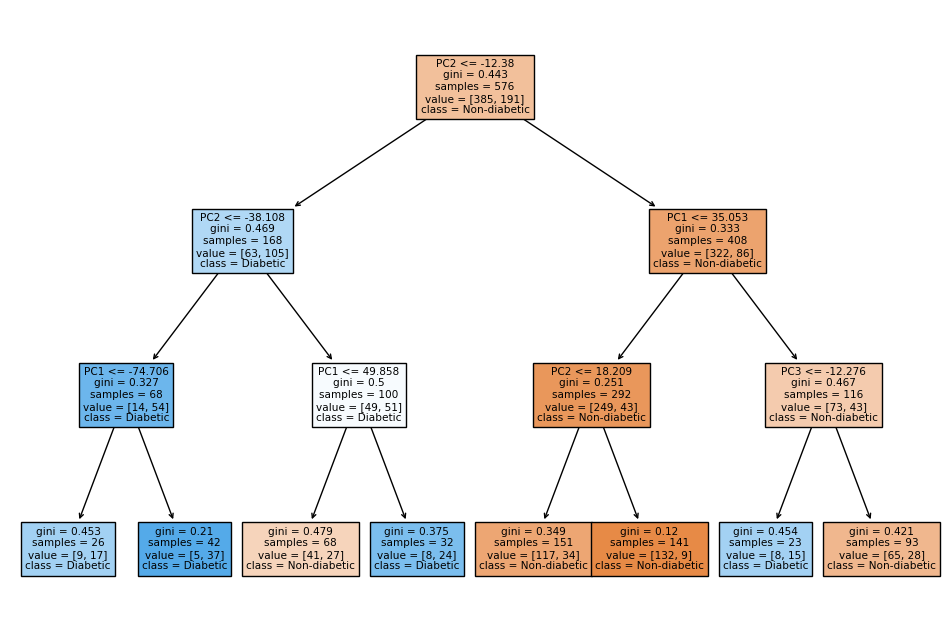

In [17]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Créer et entraîner un arbre de décision avec une profondeur de 3
decision_tree = DecisionTreeClassifier(max_depth=3)
decision_tree.fit(X_train_pca, y_train)

# Visualiser l'arbre de décision
plt.figure(figsize=(12, 8))
plot_tree(decision_tree, filled=True, feature_names=[f'PC{i+1}' for i in range(3)], class_names=["Non-diabetic", "Diabetic"])
plt.show()


Quelle est l'estimation  pour la nouvelle donnée
Xnew=[1, 50,27,25,88,70,20]

In [29]:
# Nouvelle donnée à estimer
X_new = [[1, 50, 27, 25, 88, 70, 20]]

pca_3 = PCA(n_components=3)
X_pca_3 = pca_3.fit_transform(X)
# Convertir en un tableau numpy 2D
X_new_array = np.array(X_new)

# Réduire la dimension de la nouvelle donnée avec PCA
X_new_pca_3 = pca_3.transform(X_new_array)

# Prédire la classe avec le modèle d'arbre de décision entraîné
prediction_new_data = decision_tree.predict(X_new_pca_3)

print("Estimation pour la nouvelle donnée :", prediction_new_data)

Estimation pour la nouvelle donnée : [0]


c:\Users\Etudiant\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
